In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calories-burning-dataset/exercise.csv
/kaggle/input/calories-burning-dataset/calories.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/calories-burning-dataset/calories.csv")
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
df1.shape

(15000, 2)

In [5]:
df2 = pd.read_csv("/kaggle/input/calories-burning-dataset/exercise.csv")
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df2.shape

(15000, 8)

In [7]:
# Συγχώνευση των δύο datasets με βάση το User_ID
df = pd.merge(df2, df1, on="User_ID", how="inner")

# Εμφάνιση των πρώτων γραμμών του συγχωνευμένου dataset
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# Περιγραφική στατιστική ανάλυση
df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
df.drop(columns = ["User_ID"],axis=1,inplace =True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
# One-hot encoding για το φύλο
df = pd.get_dummies(df, drop_first=True)  # δημιουργεί μόνο μια στήλη 'Gender_male'
df.head()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,27,154.0,58.0,10.0,81.0,39.8,35.0,False


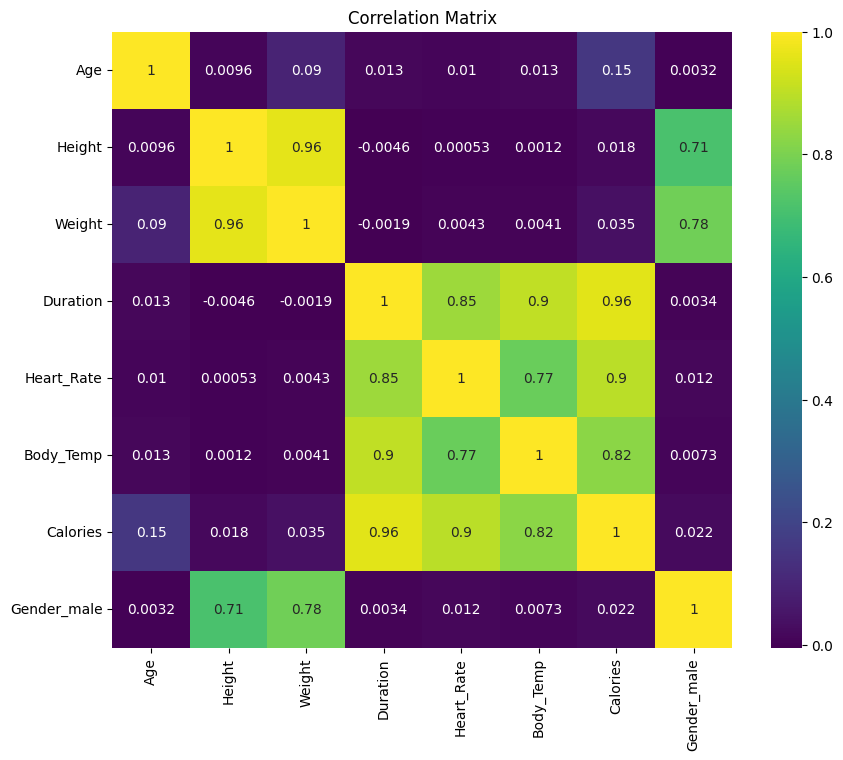

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()



In [16]:
X = df.drop("Calories", axis=1)
y = df["Calories"]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
from sklearn import metrics

y_pred = model.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", metrics.r2_score(y_test, y_pred))


MAE: 1.4984578529596329
MSE: 4.568119785030486
RMSE: 2.1373160236685838
R² Score: 0.9988680981634738


In [24]:
# Εμφάνιση των ονομάτων των στηλών
print(df.columns)


Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Gender_male'],
      dtype='object')


In [25]:
# Δημιουργία της στήλης 'Gender' από τη στήλη 'Gender_male'
df['Gender'] = df['Gender_male'].apply(lambda x: 'male' if x == 1 else 'female')


In [26]:
# Αφαίρεση της στήλης 'Gender_male'
df.drop('Gender_male', axis=1, inplace=True)


In [27]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

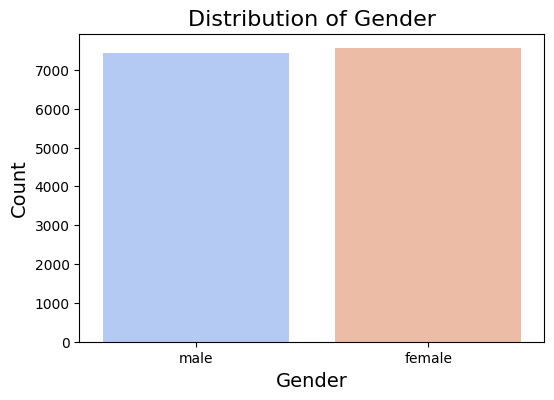

In [28]:
#  seaborn
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='coolwarm')  # Επέλεξα την παλέτα 'coolwarm' για ωραία χρώματα
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Ρυθμίζει την κλίση των labels στον άξονα X
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

# Κωδικοποίηση του φύλου (Gender) με LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [31]:
X = df.drop('Calories', axis=1)  # Χαρακτηριστικά
y = df['Calories']  # Στόχος


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Χρήση RandomForestRegressor για πρόβλεψη
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Κάνουμε πρόβλεψη
y_pred = model.predict(X_test)

# Αξιολόγηση Μοντέλου
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



MAE: 1.7139333333333333
MSE: 7.175823133333334
RMSE: 2.678772691613332


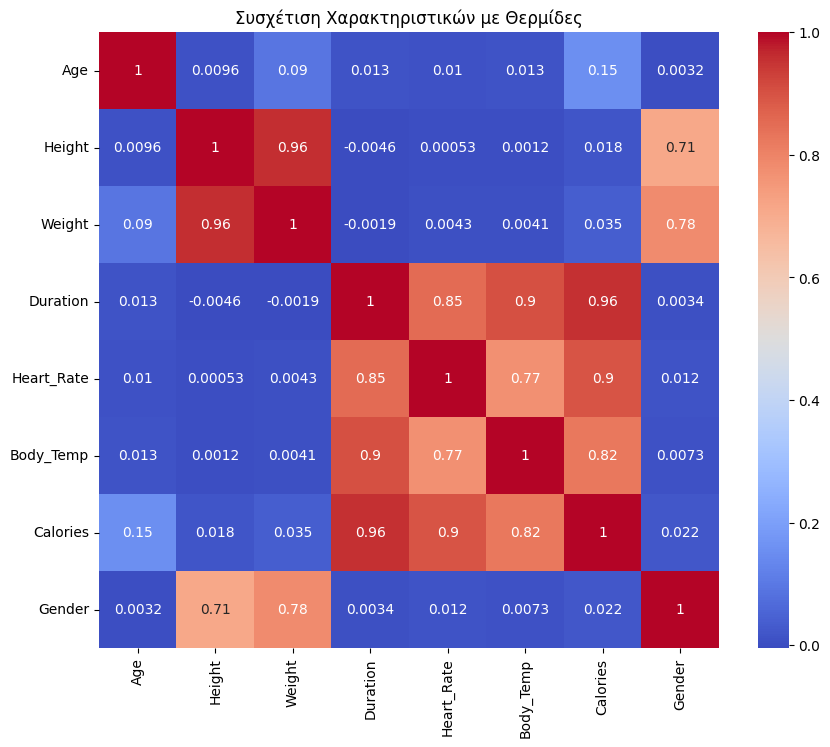

In [35]:
# Εξερεύνηση Συσχετίσεων με Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Συσχέτιση Χαρακτηριστικών με Θερμίδες")
plt.show()


Εξέταση Διαφορετικών Μοντέλων
Μπορούμε να δοκιμάσουμε και άλλα μοντέλα για να δούμε ποιο από αυτά προσφέρει την καλύτερη απόδοση. Εδώ είναι μερικά μοντέλα που μπορείς να δοκιμάσεις:

Linear Regression: Βασικό μοντέλο γραμμικής παλινδρόμησης.

Decision Tree Regressor: Απλό δέντρο απόφασης.

XGBoost Regressor: Πολύ ισχυρό μοντέλο που συχνά αποδίδει καλά.

RandomForest Regressor: Όπως έχεις ήδη δοκιμάσει, αυτό είναι ένα ισχυρό μοντέλο βασισμένο σε σύνολο δέντρων.

In [36]:
from sklearn.linear_model import LinearRegression

# Δημιουργία του μοντέλου Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Κάνουμε πρόβλεψη
lr_pred = lr_model.predict(X_test)

# Αξιολόγηση
print("Linear Regression - MAE:", metrics.mean_absolute_error(y_test, lr_pred))
print("Linear Regression - MSE:", metrics.mean_squared_error(y_test, lr_pred))
print("Linear Regression - RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))


Linear Regression - MAE: 8.441513553849719
Linear Regression - MSE: 131.99574575081692
Linear Regression - RMSE: 11.488940149152876


In [37]:
from xgboost import XGBRegressor

# Δημιουργία του μοντέλου XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Κάνουμε πρόβλεψη
xgb_pred = xgb_model.predict(X_test)

# Αξιολόγηση
print("XGBoost - MAE:", metrics.mean_absolute_error(y_test, xgb_pred))
print("XGBoost - MSE:", metrics.mean_squared_error(y_test, xgb_pred))
print("XGBoost - RMSE:", np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))


XGBoost - MAE: 1.4984578529596329
XGBoost - MSE: 4.568119785030486
XGBoost - RMSE: 2.1373160236685838


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

# Βελτιωμένες υπερπαράμετροι
print("Best parameters:", grid_search.best_params_)

# Εκτίμηση με το βελτιστοποιημένο μοντέλο
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Αξιολόγηση
print("Best Model - MAE:", metrics.mean_absolute_error(y_test, y_pred_best))
print("Best Model - MSE:", metrics.mean_squared_error(y_test, y_pred_best))
print("Best Model - RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best)))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}
Best Model - MAE: 1.704282222222222
Best Model - MSE: 7.132764725925927
Best Model - RMSE: 2.6707236333858897


In [39]:
# Σημασία των χαρακτηριστικών με RandomForest
feature_importances = model.feature_importances_
features = X.columns

# Δημιουργία DataFrame για παρουσίαση
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Εμφάνιση των πιο σημαντικών χαρακτηριστικών
print(feature_df)


      Feature  Importance
3    Duration    0.913865
4  Heart_Rate    0.048345
0         Age    0.026337
6      Gender    0.006722
2      Weight    0.002981
1      Height    0.001243
5   Body_Temp    0.000507


In [41]:
import pickle

# Αποθήκευση του μοντέλου
with open("calories_burnt_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


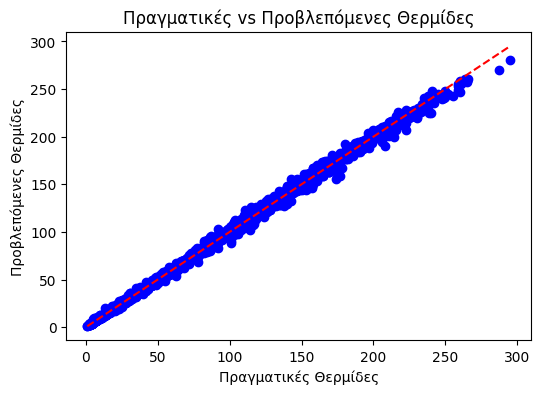

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Πραγματικές vs Προβλεπόμενες Θερμίδες')
plt.xlabel('Πραγματικές Θερμίδες')
plt.ylabel('Προβλεπόμενες Θερμίδες')
plt.show()


In [43]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories',
 'Gender']

In [44]:
Numerical = df[Num_col]
Numerical.head() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

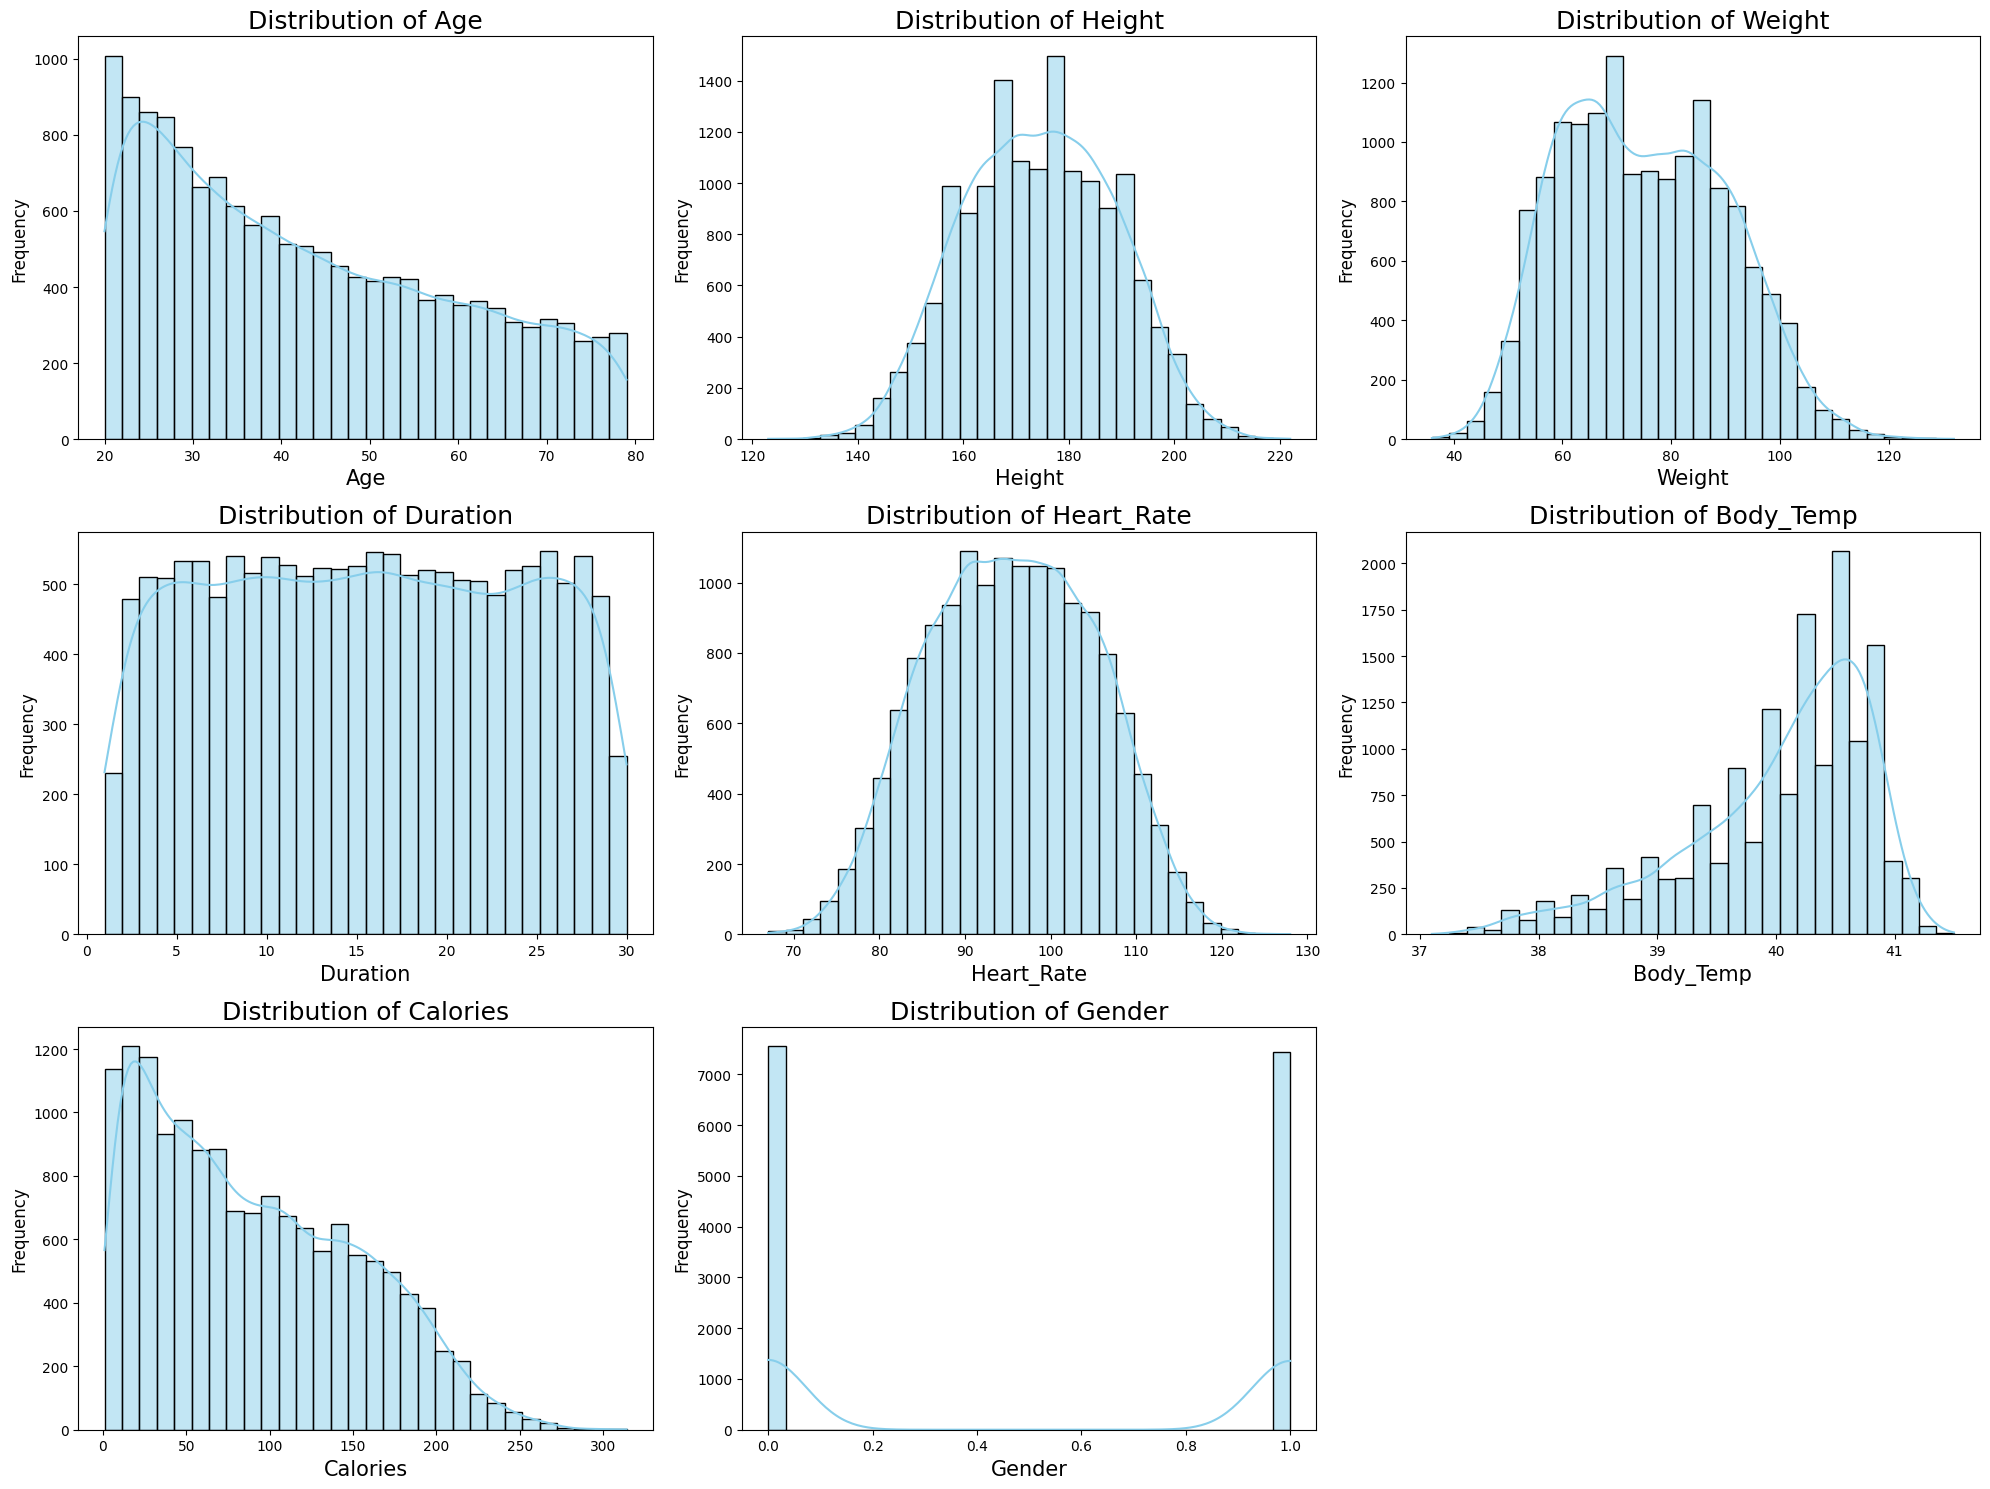

In [46]:

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in Numerical:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(Numerical[column], kde=True, color="skyblue", bins=30)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Frequency', fontsize=12)
        plt.title(f'Distribution of {column}', fontsize=18)
        plotnumber += 1

plt.tight_layout()
plt.show()


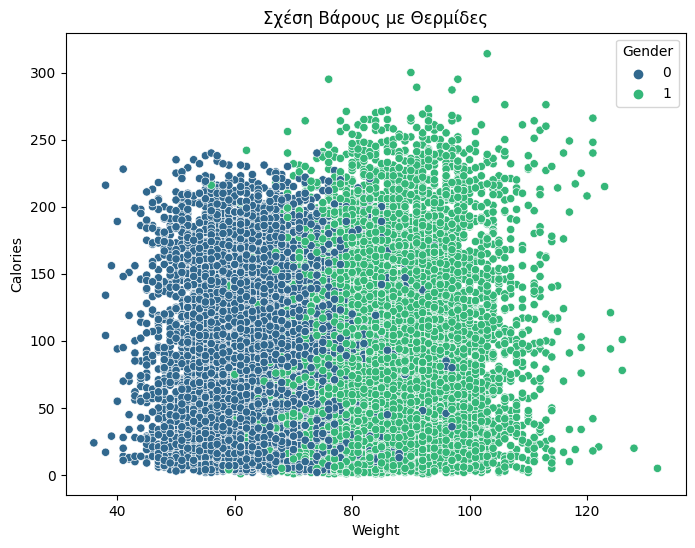

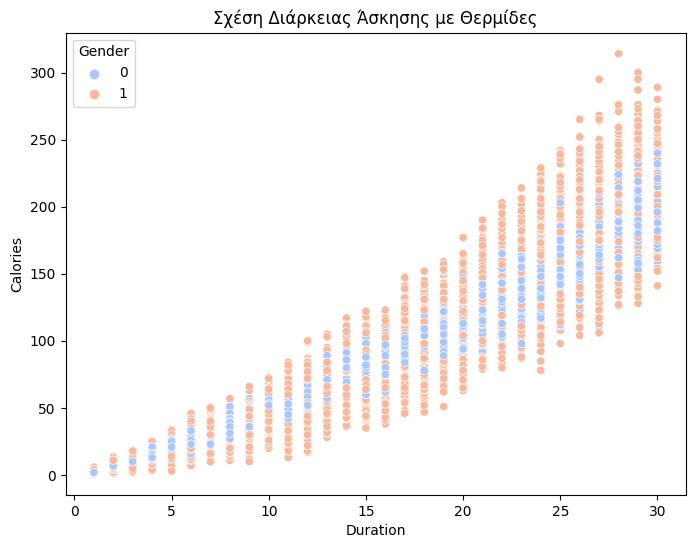

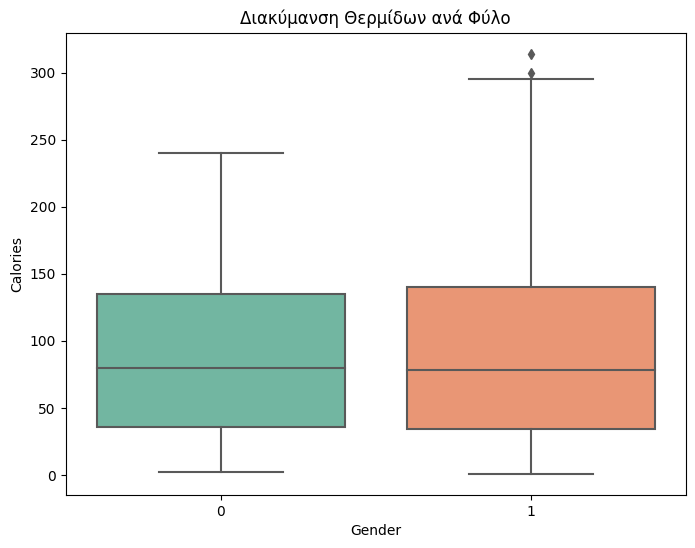

[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   3.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   3.7s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=   5.5s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=20, min_

In [45]:
# Scatter plot για να εξετάσουμε τη σχέση μεταξύ 'Weight' και 'Calories'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Calories', data=df, hue='Gender', palette='viridis')
plt.title('Σχέση Βάρους με Θερμίδες')
plt.show()

# Scatter plot για 'Duration' και 'Calories'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Calories', data=df, hue='Gender', palette='coolwarm')
plt.title('Σχέση Διάρκειας Άσκησης με Θερμίδες')
plt.show()

# Box plot για να δούμε τη διακύμανση των θερμίδων ανάλογα με το φύλο
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=df, palette='Set2')
plt.title('Διακύμανση Θερμίδων ανά Φύλο')
plt.show()


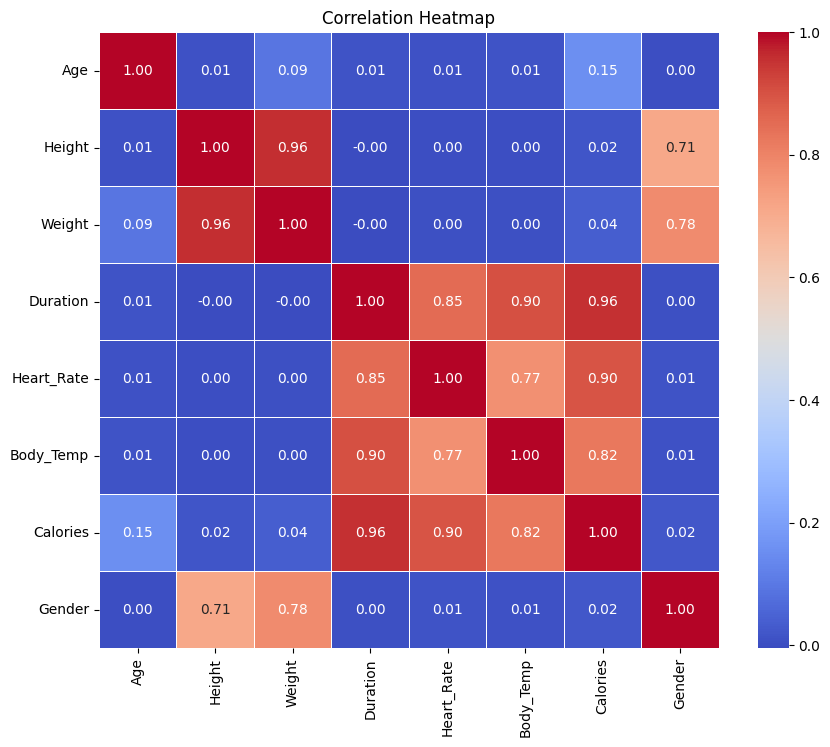

In [47]:
# Εξερεύνηση Συσχετίσεων με Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


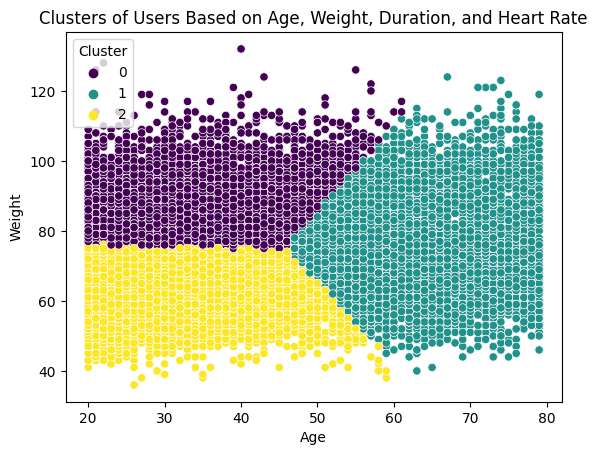

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Weight', 'Duration', 'Heart_Rate']])
sns.scatterplot(data=df, x='Age', y='Weight', hue='Cluster', palette='viridis')
plt.title('Clusters of Users Based on Age, Weight, Duration, and Heart Rate')
plt.show()


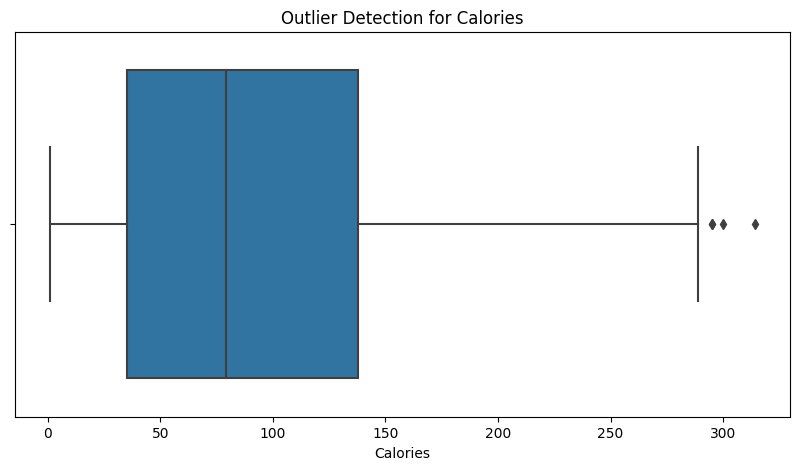

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Calories')
plt.title("Outlier Detection for Calories")
plt.show()


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores: {scores}")


Cross-Validation Scores: [-13.66896446 -12.58885136 -13.04572492 -14.1966174  -14.76745259]


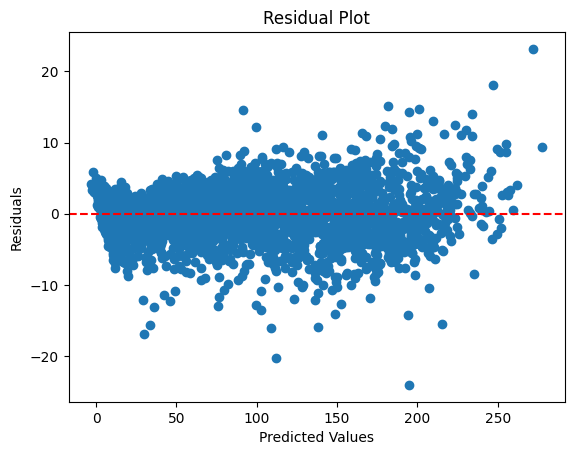

In [53]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [48]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)


In [56]:

# Υπολογισμός του BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Υπολογισμός του Heart Rate to Duration Ratio
df['HRD_Ratio'] = df['Heart_Rate'] / df['Duration']

# Δημιουργία Κατηγοριών Ηλικίας
bins = [0, 20, 40, 60, 100]  # Όρια για τις κατηγορίες
labels = ['<20', '20-40', '40-60', '>60']  # Ετικέτες για τις κατηγορίες
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Δημιουργία Εντάσεως Άσκησης
conditions = [
    (df['Heart_Rate'] > 100),  # Υψηλή ένταση
    (df['Heart_Rate'] > 80) & (df['Heart_Rate'] <= 100),  # Μέτρια ένταση
    (df['Heart_Rate'] <= 80)  # Χαμηλή ένταση
]
choices = ['High', 'Medium', 'Low']
df['Activity_Intensity'] = np.select(conditions, choices, default='Unknown')

# Εμφάνιση των πρώτων γραμμών του DataFrame για να δούμε τα νέα χαρακτηριστικά
df.head()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender,BMI,Cluster,HRD_Ratio,Age_Group,Activity_Intensity
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1,26.038781,1,3.620690,>60,High
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0,21.773842,2,6.714286,20-40,Medium
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1,24.655910,1,17.600000,>60,Medium
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0,22.159109,2,7.692308,20-40,Medium
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0,24.456063,2,8.100000,20-40,Medium


In [57]:
# Υπολογισμός του BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Υπολογισμός του Heart Rate to Duration Ratio
df['HRD_Ratio'] = df['Heart_Rate'] / df['Duration']

# Δημιουργία Κατηγοριών Ηλικίας
bins = [0, 20, 40, 60, 100]  # Όρια για τις κατηγορίες
labels = ['<20', '20-40', '40-60', '>60']  # Ετικέτες για τις κατηγορίες
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Δημιουργία Εντάσεως Άσκησης
conditions = [
    (df['Heart_Rate'] > 100),  # Υψηλή ένταση
    (df['Heart_Rate'] > 80) & (df['Heart_Rate'] <= 100),  # Μέτρια ένταση
    (df['Heart_Rate'] <= 80)  # Χαμηλή ένταση
]
choices = ['High', 'Medium', 'Low']
df['Activity_Intensity'] = np.select(conditions, choices, default='Unknown')

# Εμφάνιση των πρώτων γραμμών του DataFrame για να δούμε τα νέα χαρακτηριστικά
df.head()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender,BMI,Cluster,HRD_Ratio,Age_Group,Activity_Intensity
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1,26.038781,1,3.620690,>60,High
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0,21.773842,2,6.714286,20-40,Medium
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1,24.655910,1,17.600000,>60,Medium
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0,22.159109,2,7.692308,20-40,Medium
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0,24.456063,2,8.100000,20-40,Medium


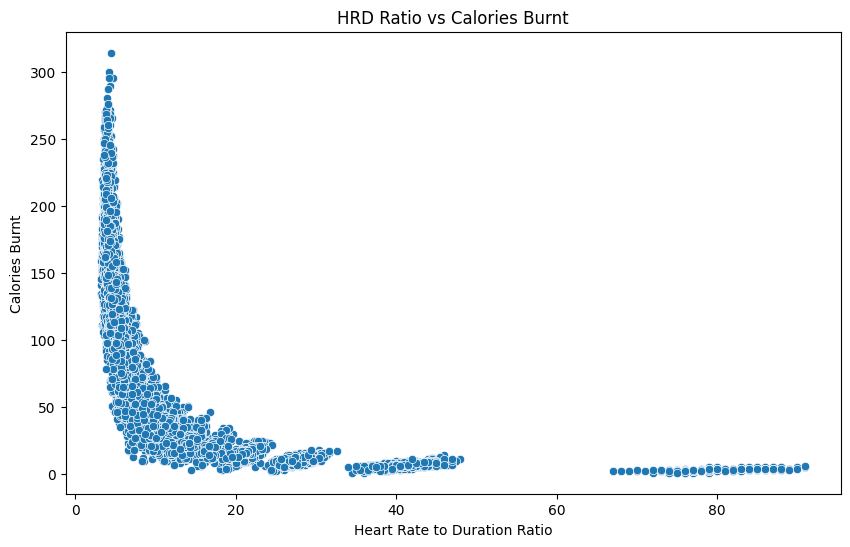

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HRD_Ratio', y='Calories', data=df)
plt.title("HRD Ratio vs Calories Burnt")
plt.xlabel("Heart Rate to Duration Ratio")
plt.ylabel("Calories Burnt")
plt.show()


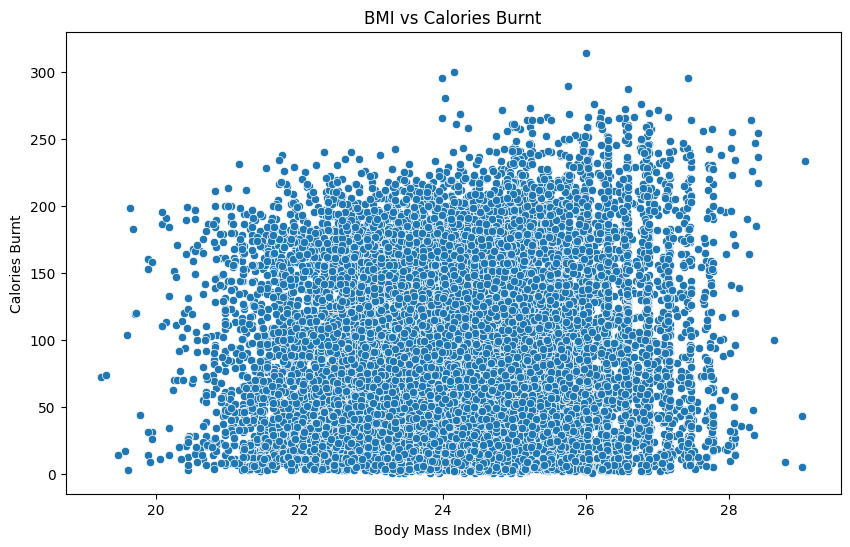

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Calories', data=df)
plt.title("BMI vs Calories Burnt")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Calories Burnt")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


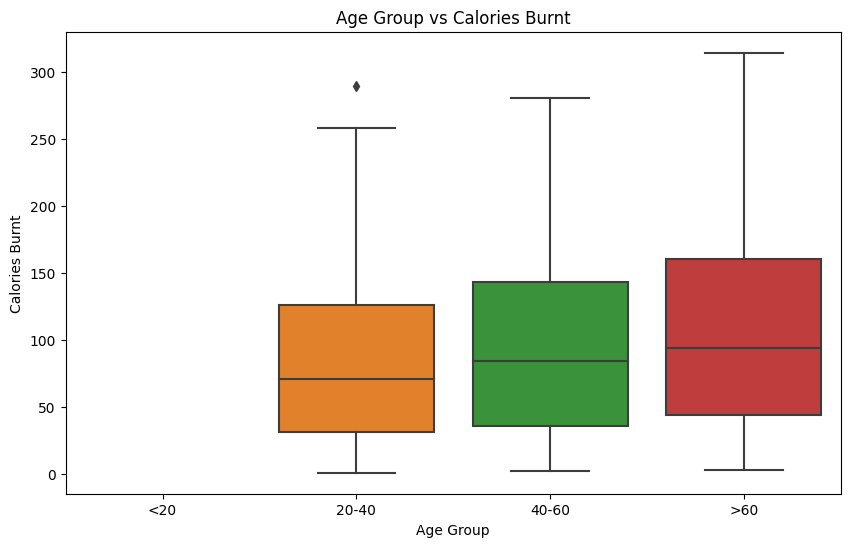

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Calories', data=df)
plt.title("Age Group vs Calories Burnt")
plt.xlabel("Age Group")
plt.ylabel("Calories Burnt")
plt.show()


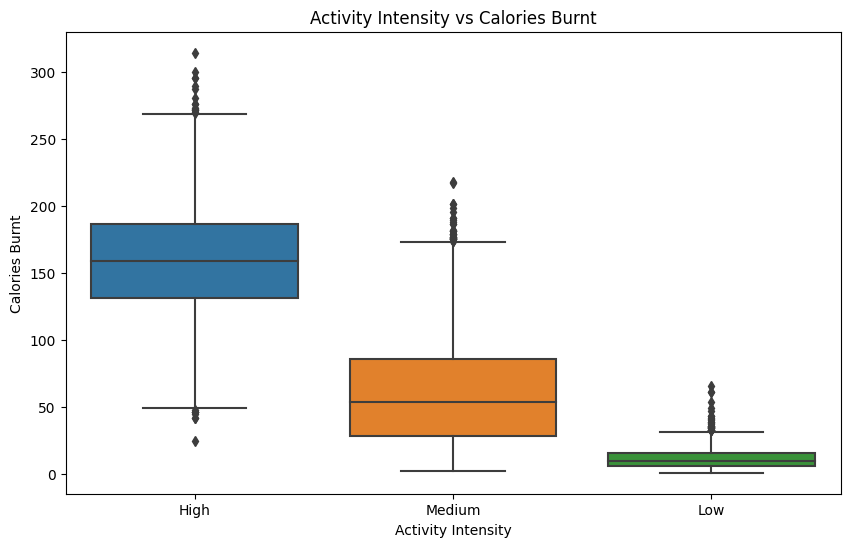

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity_Intensity', y='Calories', data=df)
plt.title("Activity Intensity vs Calories Burnt")
plt.xlabel("Activity Intensity")
plt.ylabel("Calories Burnt")
plt.show()
